In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import shapiro,kstest


In [74]:
data = pd.read_csv("dataset.csv")
data['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [75]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [76]:
data['bmi'].min()

15.96

In [77]:
data['bmi'].max()

53.13

In [78]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [79]:
data.loc[data['charges'].duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [80]:
data.drop_duplicates(subset="charges", keep=False, inplace=True)

In [81]:
nbBmi =  (data['bmi'].max() - data['bmi'].min())/0.005
nbAge = data['age'].max() - data['age'].min()
sexe = 2
nbChildren = data['children'].max()
smoker = 2
nbRegion = 4


proba = nbBmi * nbAge * sexe * nbChildren * smoker * nbRegion 

proba



27357120.0

In [82]:
data['bmi'].mean()



30.66350673652694

In [83]:
data['bmi'].median()


30.38

In [84]:
data['sex'] = data['sex'].replace(['male','female'],['0','1']).astype(int)
data['smoker'] = data['smoker'].replace(['no','yes'],['0','1']).astype(int)
data['region'] = data['region'].replace(['southwest','southeast','northwest','northeast'],['0','1','2','3']).astype(int)
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [85]:

data.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787217
age         0.297606
bmi         0.198461
children    0.066779
region      0.006886
sex        -0.058799
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='charges'>

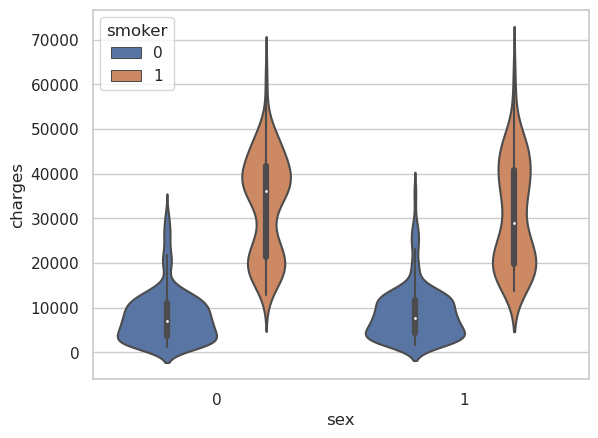

In [86]:
sns.set(style="whitegrid")
sns.violinplot(x="sex", y="charges", hue="smoker", data=data)

<AxesSubplot:xlabel='sex', ylabel='charges'>

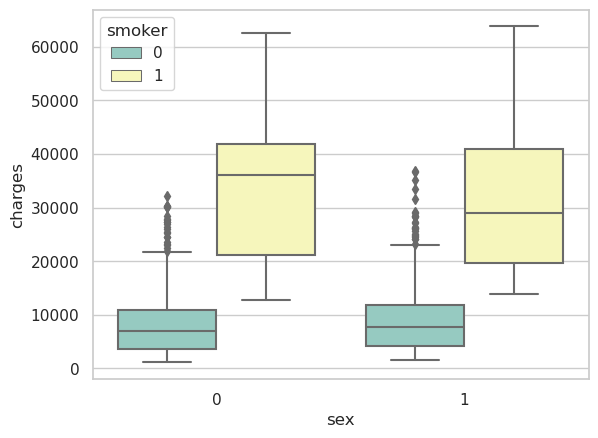

In [87]:
sns.set(style="whitegrid")
sns.boxplot(x="sex", y="charges", hue="smoker", data=data, palette="Set3")

<AxesSubplot:xlabel='age_group', ylabel='charges'>

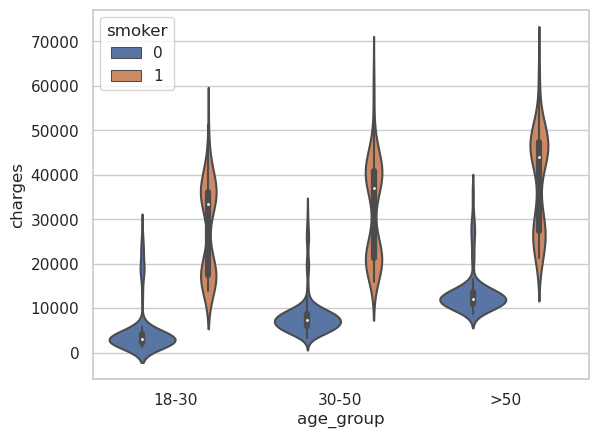

In [88]:
data['age_group'] = pd.cut(data['age'], bins=[18,30,50,100], labels=['18-30','30-50','>50'])
sns.set(style="whitegrid")
sns.violinplot(x="age_group", y="charges", hue="smoker", data=data)


<AxesSubplot:xlabel='age_group', ylabel='charges'>

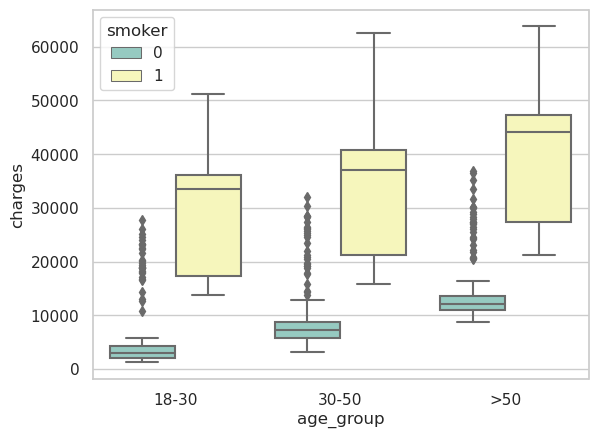

In [89]:
sns.boxplot(x="age_group", y="charges", hue="smoker", data=data, palette="Set3")

In [90]:
data['age'].describe()

count    1336.000000
mean       39.237275
std        14.038678
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [91]:
data['sex'].value_counts()

0    674
1    662
Name: sex, dtype: int64

In [92]:
data['smoker'].value_counts()

0    1062
1     274
Name: smoker, dtype: int64

In [93]:
data['region'].value_counts()

1    364
0    325
3    324
2    323
Name: region, dtype: int64

In [94]:
data['charges'].describe()

count     1336.000000
mean     13287.833731
std      12110.702320
min       1121.873900
25%       4746.875675
50%       9388.753650
75%      16687.364100
max      63770.428010
Name: charges, dtype: float64

In [95]:
data['children'].value_counts()

0    572
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [96]:
p_age = kstest(data['age'], 'norm')
print('l\'âge:', p_age)

l'âge: KstestResult(statistic=1.0, pvalue=0.0)


In [97]:
p_sex = kstest(data['sex'], 'norm')
print('sexe:', p_sex)

sexe: KstestResult(statistic=0.5, pvalue=2.252529101374083e-309)


In [98]:
p_reg = kstest(data['region'], 'norm')
print('region:', p_reg)

region: KstestResult(statistic=0.5980812730146507, pvalue=0.0)


In [99]:
p_smoker = kstest(data['smoker'], 'norm')
print('smoker:', p_smoker)

smoker: KstestResult(statistic=0.5, pvalue=2.252529101374083e-309)


In [100]:
p_imc = kstest(data['bmi'], 'norm')
print('imc:', p_imc)




imc: KstestResult(statistic=1.0, pvalue=0.0)


In [101]:
p_charges = kstest(data['charges'], 'norm')
print('charges:', p_charges)

charges: KstestResult(statistic=1.0, pvalue=0.0)


In [102]:
# data['sex'] = data['sex'].apply(lambda x: np.log(x+1))
data['age'] = data['age'].apply(lambda x: np.log(x+1))
# data['children'] = data['children'].apply(lambda x: np.log(x+1))
# data['region'] = data['region'].apply(lambda x: np.log(x+1))
# data['smoker'] = data['smoker'].apply(lambda x: np.log(x+1))
data['bmi'] = data['bmi'].apply(lambda x: np.log(x+1))
data

,age,sex,bmi,children,smoker,region,charges,age_group
0,2.995732,1,3.363842,0,1,0,16884.92400,18-30
1,2.944439,0,3.548755,1,0,1,1725.55230,NaN
2,3.367296,0,3.526361,3,0,1,4449.46200,18-30
3,3.526361,0,3.165686,0,0,2,21984.47061,30-50
4,3.496508,0,3.397189,0,0,2,3866.85520,30-50
...,...,...,...,...,...,...,...,...
1333,3.931826,0,3.464798,3,0,2,10600.54830,30-50
1334,2.944439,1,3.494080,0,0,3,2205.98080,NaN
1335,2.944439,1,3.633631,0,0,1,1629.83350,NaN
1336,3.091042,1,3.288402,0,0,0,2007.94500,18-30


In [103]:
data.corr()['charges'].sort_values(ascending=False)

/tmp/ipykernel_9842/2279012400.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['charges'].sort_values(ascending=False)


charges     1.000000
smoker      0.787217
age         0.288729
bmi         0.199585
children    0.066779
region      0.006886
sex        -0.058799
Name: charges, dtype: float64